# PyTorch software benchmark analysis

Single node throughput comparisons between installation versions

In [1]:
import os
import re
import glob

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
plt.rcParams.update({'font.size': 14})

## Load the results

In [4]:
results_files = glob.glob('/global/cscratch1/sd/sfarrell/pytorch-benchmarks/hsw-*-n1/results.txt')

results_files

['/global/cscratch1/sd/sfarrell/pytorch-benchmarks/hsw-v1.1.0-n1/results.txt',
 '/global/cscratch1/sd/sfarrell/pytorch-benchmarks/hsw-v1.2.0-n1/results.txt']

In [5]:
results = [pd.read_csv(f, delim_whitespace=True) for f in results_files]
results = pd.concat(results, ignore_index=True)

results

,train_rate,inference_rate,ranks,hardware,version,model
0,11.870135,28.141897,1,hsw,v1.1.0,inceptionV3
1,346.228699,767.815492,1,hsw,v1.1.0,lstm
2,166.189031,733.151770,1,hsw,v1.1.0,alexnet
3,13.667592,22.922043,1,hsw,v1.1.0,resnet50
4,18.778390,59.137775,1,hsw,v1.1.0,vgg11
5,194.423647,411.256969,1,hsw,v1.1.0,cnn3d
6,13.557418,47.904272,1,hsw,v1.2.0,inceptionV3
7,362.557148,796.934826,1,hsw,v1.2.0,lstm
8,203.419221,714.774127,1,hsw,v1.2.0,alexnet
9,14.629206,50.253714,1,hsw,v1.2.0,resnet50


## Training throughput comparisons

In [6]:
models = results.model.unique()

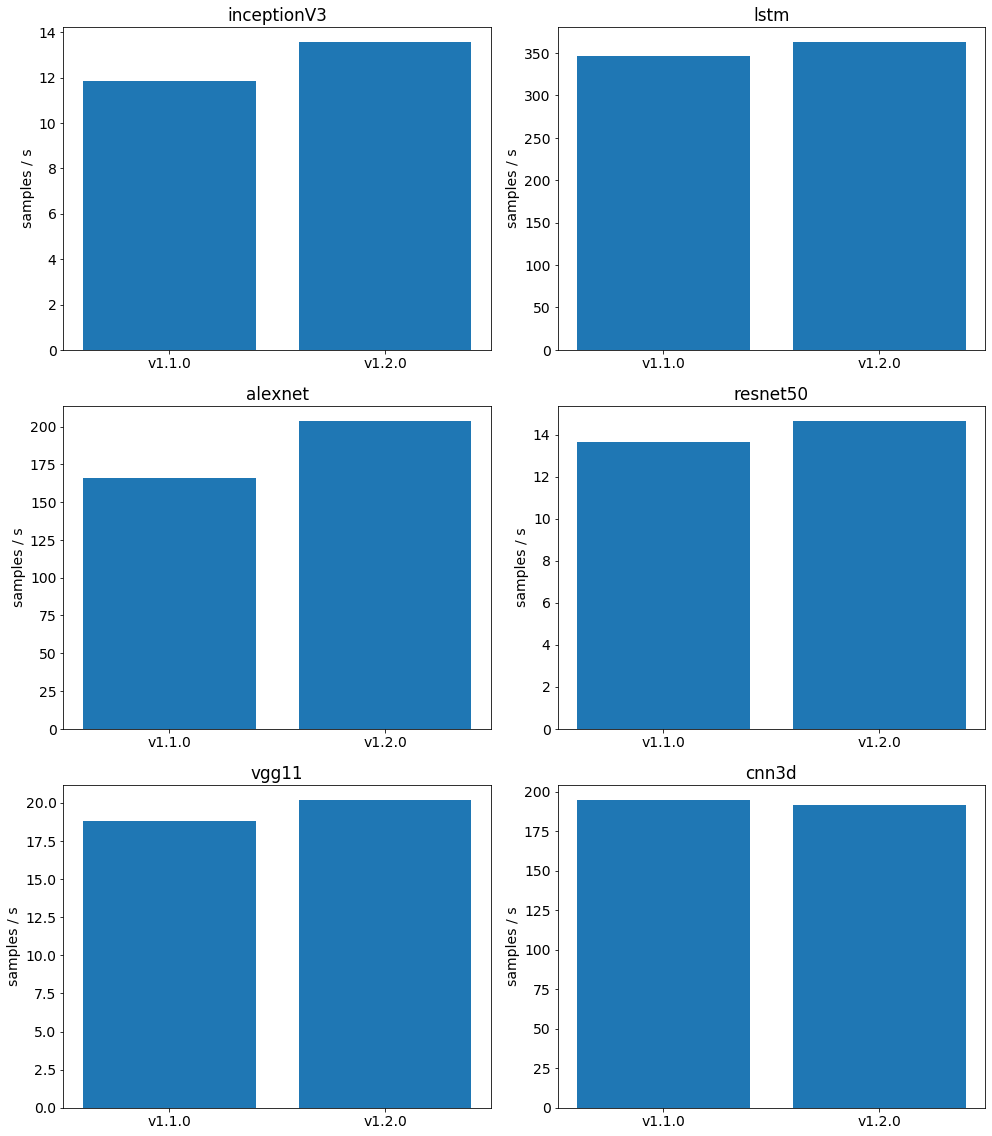

In [7]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 16))
axs = axs.flatten()

for i, model in enumerate(models):
    ax = axs[i]
    model_results = results[results.model == model]
    ax.bar(model_results.version, model_results.train_rate)
    ax.set_title(model)
    ax.set_ylabel('samples / s')

plt.tight_layout()

## Inference throughput comparisons

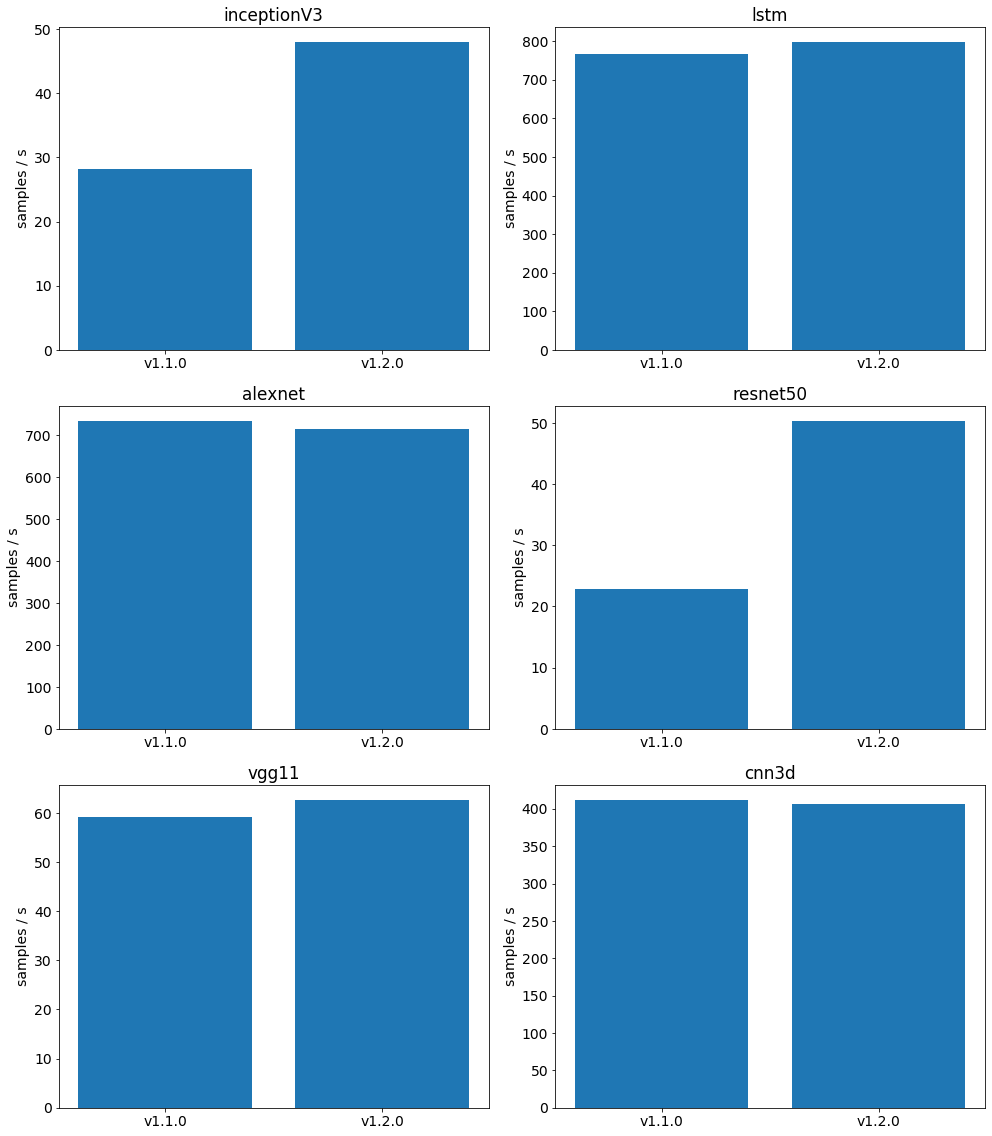

In [8]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 16))
axs = axs.flatten()

for i, model in enumerate(models):
    ax = axs[i]
    model_results = results[results.model == model]
    ax.bar(model_results.version, model_results.inference_rate)
    ax.set_title(model)
    ax.set_ylabel('samples / s')

plt.tight_layout()